In [ ]:
!pip install opendatasets

In [1]:
# {"username":"keeplooking","key":"5a66906a29ae25fdb865a1eda7e7c25d"}
import opendatasets as od
# od.download("https://www.kaggle.com/datasets/rhtsingh/130k-images-512x512-universal-image-embeddings")
# od.download("https://www.kaggle.com/datasets/paulchambaz/google-street-view") # 太简单
# od.download("https://www.kaggle.com/datasets/kayvanshah/landmarks-dataset")
# od.download("https://www.kaggle.com/datasets/arnaud58/landscape-pictures") # 太多
od.download("https://www.kaggle.com/datasets/stelath/city-street-view-dataset")
# 650 + 650 + 170

Skipping, found downloaded files in ".\google-street-view" (use force=True to force download)


In [ ]:
!python train_reg.py -w 42

In [2]:
from model import mobilenetv3, regnet
import torch
import torch.nn as nn

def predict(md, inputs):
    outputs = md(inputs)
    return torch.argmax(outputs, dim=1) / md.n_class * 360

# mode = "small"
# # mode = "large"
# net = mobilenetv3(n_class=180, mode = mode)
# net.load_state_dict(torch.load(f"mobilenetv3_{mode}_best.pth", map_location=torch.device('cpu')))
# net.eval()

model = regnet(n_class=180, train=False)
model.load_state_dict(torch.load(f"regnet_best.pth", map_location=torch.device('cpu')))
model.eval()

inputs = torch.randn(1, 3, 224, 224)
model.predict(inputs)

tensor([18.])

In [3]:
inputs = torch.randn(1, 3, 224, 224)
model.predict(inputs).item()

18.0

<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE96B2648>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE07F10C8>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE8693448>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE869C288>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE8682C08>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE7232748>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE96ADBC8>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE96ADA48>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE96B59C8>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE96AD608>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE96B5048>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE868EC48>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE70F7F88>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE719E3C8>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE969B8C8>
<PIL.Image.Image image mode=RGB size=350x350 at 0x21CE7

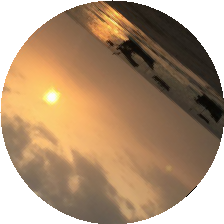

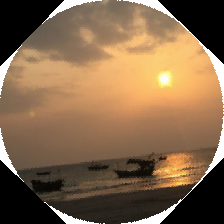

torch.Size([3, 224, 224])
316.0


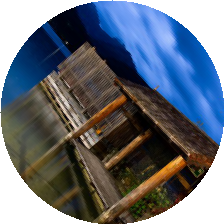

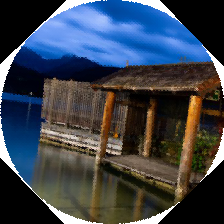

torch.Size([3, 224, 224])
136.0


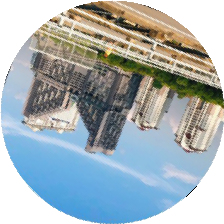

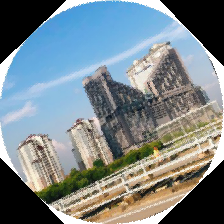

torch.Size([3, 224, 224])
314.0


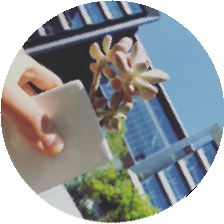

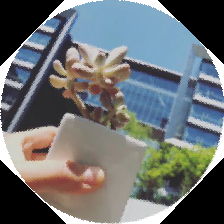

torch.Size([3, 224, 224])
44.0


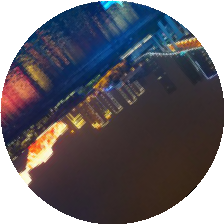

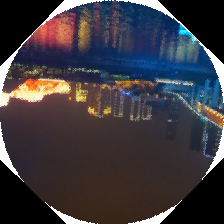

torch.Size([3, 224, 224])
136.0


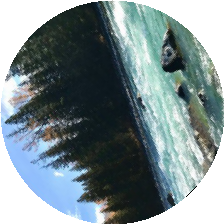

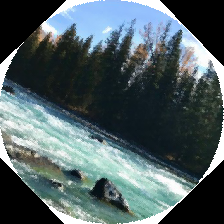

torch.Size([3, 224, 224])
136.0


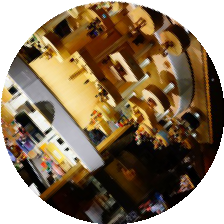

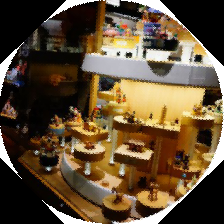

torch.Size([3, 224, 224])
136.0


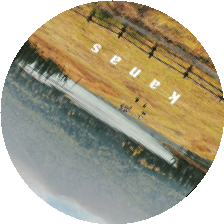

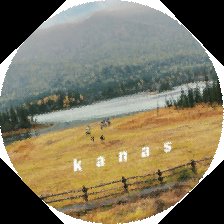

torch.Size([3, 224, 224])
224.00001525878906


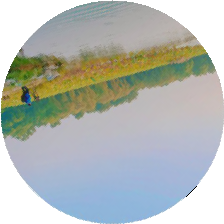

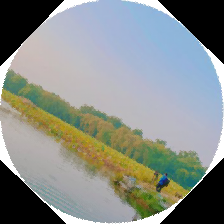

torch.Size([3, 224, 224])
178.0


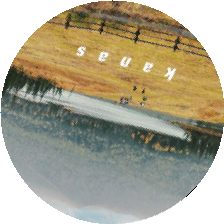

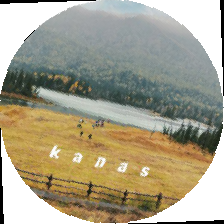

torch.Size([3, 224, 224])
136.0


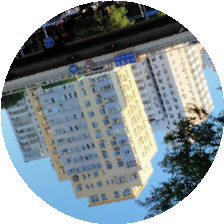

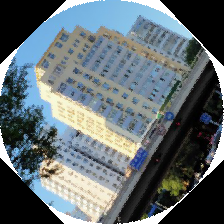

torch.Size([3, 224, 224])
136.0


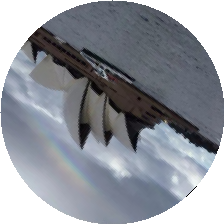

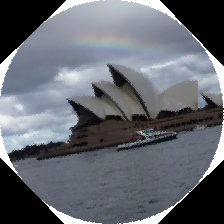

torch.Size([3, 224, 224])
136.0


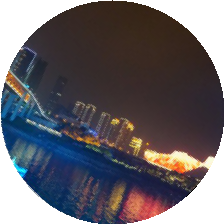

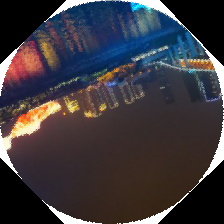

torch.Size([3, 224, 224])
136.0


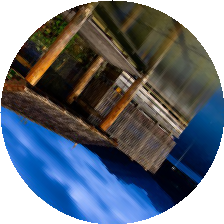

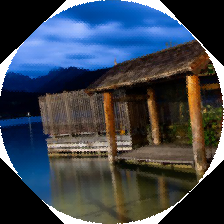

torch.Size([3, 224, 224])
225.99998474121094


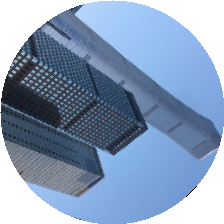

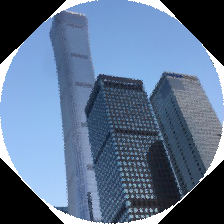

torch.Size([3, 224, 224])
136.0


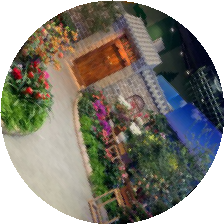

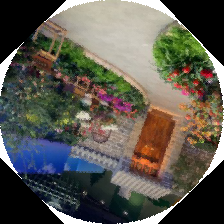

torch.Size([3, 224, 224])
224.00001525878906


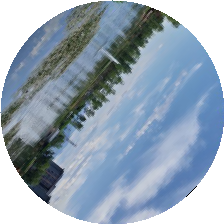

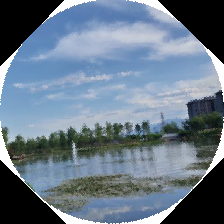

torch.Size([3, 224, 224])
224.00001525878906


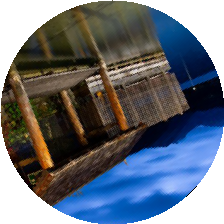

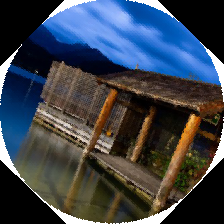

torch.Size([3, 224, 224])
136.0


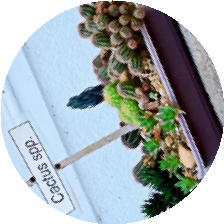

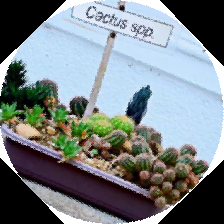

torch.Size([3, 224, 224])
314.0


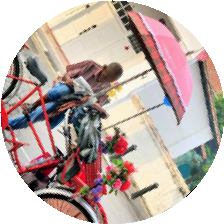

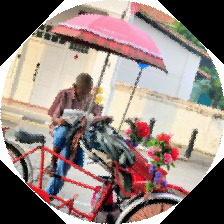

torch.Size([3, 224, 224])
200.00001525878906


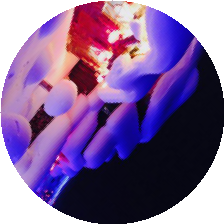

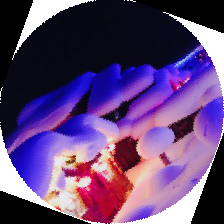

torch.Size([3, 224, 224])
358.0


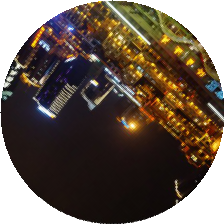

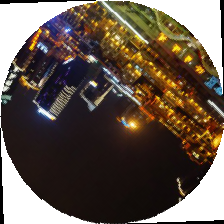

torch.Size([3, 224, 224])
270.0


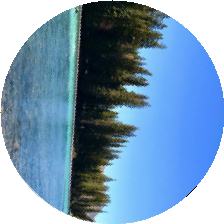

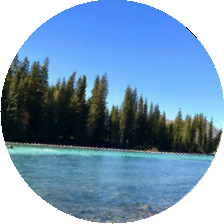

torch.Size([3, 224, 224])
314.0


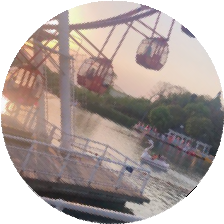

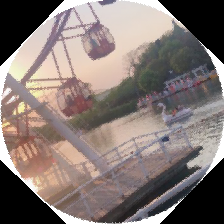

torch.Size([3, 224, 224])
136.0


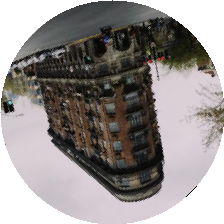

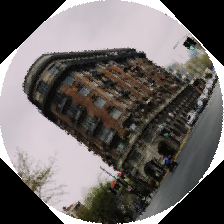

torch.Size([3, 224, 224])
134.0


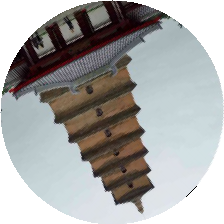

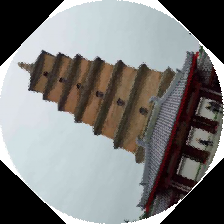

torch.Size([3, 224, 224])
136.0


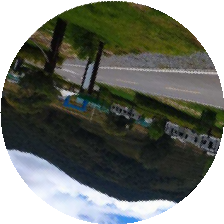

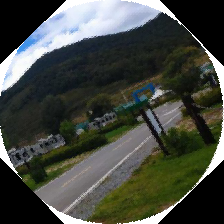

torch.Size([3, 224, 224])
314.0


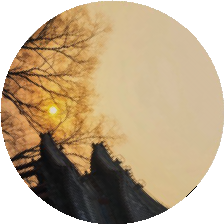

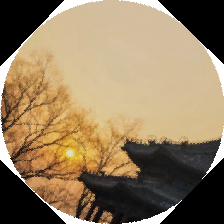

torch.Size([3, 224, 224])
225.99998474121094


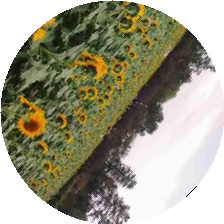

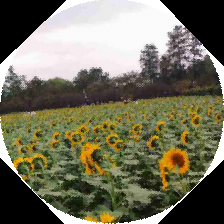

torch.Size([3, 224, 224])
316.0


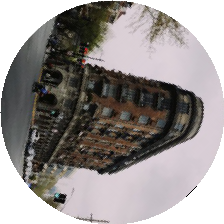

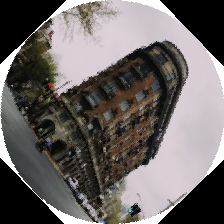

In [17]:
import os
from PIL import Image
import torchvision.transforms as T
from dataset import create_circular_mask

path = "testdata"
# path = "od"
img_list = os.listdir(path)
imgs = []
mask = create_circular_mask(224, 224, radius=112)
t1 = T.Compose([
                T.ToTensor(),
                T.RandomResizedCrop(224, scale=(0.9, 1.0), antialias=True),
            ])
tnorm = T.Normalize(
                    mean = [0.485, 0.456, 0.406],
                    std = [0.229, 0.224, 0.225]
                )
for i in img_list:
    img = Image.open(os.path.join(path, i)).convert("RGB")
    print(img)
    imgs.append(img)
def test(md):
    with torch.no_grad():
        for img in imgs:
            img = t1(img)
            inputs = T.functional.rotate(img, 45)
            print(inputs.shape)
            inputs = torch.where(mask, inputs, torch.ones_like(inputs))
            org_img = T.ToPILImage()(inputs)
            inputs = tnorm(inputs)
            # print(torch.max(inputs))
            # make inputs 4D
            inputs = inputs.unsqueeze(0)
            rot = md.predict(inputs).item()
            new_img = T.functional.rotate(org_img, - rot)

            print(rot) # angle
            display(org_img) # original image
            display(new_img) # img after rotation
            # print(new_img)
test(model)